In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jinja2

In [9]:

# Sample DataFrame
df = pd.DataFrame(np.random.randn(5, 4), 
                  columns=['one', 'two', 'three', 'four'],
                  index=['a', 'b', 'c', 'd', 'e'])


In [3]:
df

,one,two,three,four
a,1.274254,0.426764,-2.450043,-1.003662
b,-2.023805,0.267150,-0.516222,-2.664335
c,-2.095281,1.303723,-0.494474,-0.888509
d,-1.023515,-1.160388,-0.904692,-0.061591
e,1.112485,1.230435,1.197273,-0.066585


In [10]:

# See: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Building-styles
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return f'color: {color}'

styler = df.style.applymap(color_negative_red)


In [11]:

# Template handling
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')
html = template.render(my_table=styler.render())


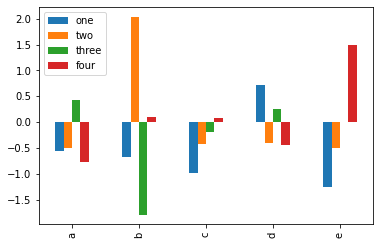

In [12]:
# Plot
ax = df.plot.bar()
fig = ax.get_figure()
fig.savefig('plot.svg')

In [13]:
# Write the HTML file
with open('report.html', 'w') as f:
    f.write(html)